In [24]:
# 모듈 불러오기
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import matplotlib.font_manager as fm  
import seaborn as sns
import pandas as pd
import numpy as np
from datetime import datetime

import plotly.express as px
import plotly.graph_objects as go

import missingno as msno
from wordcloud import WordCloud

# 폰트조절

from matplotlib import font_manager, rc
f_path = "c:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font', family=font_name)  

# 데이터 불러오기
data = pd.read_csv('Airplane_Crashes_and_Fatalities_Since_1908.csv')

ImportError: cannot import name 'dt' from 'datetime' (c:\Users\tiamo\anaconda3\lib\datetime.py)

In [4]:
data.head()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


## 결측치 확인

In [12]:
data.isnull().sum()

Date               0
Time            2219
Location          20
Operator          18
Flight #        4199
Route           1706
Type              27
Registration     335
cn/In           1228
Aboard            22
Fatalities        12
Ground            22
Summary          390
dtype: int64

<AxesSubplot:>

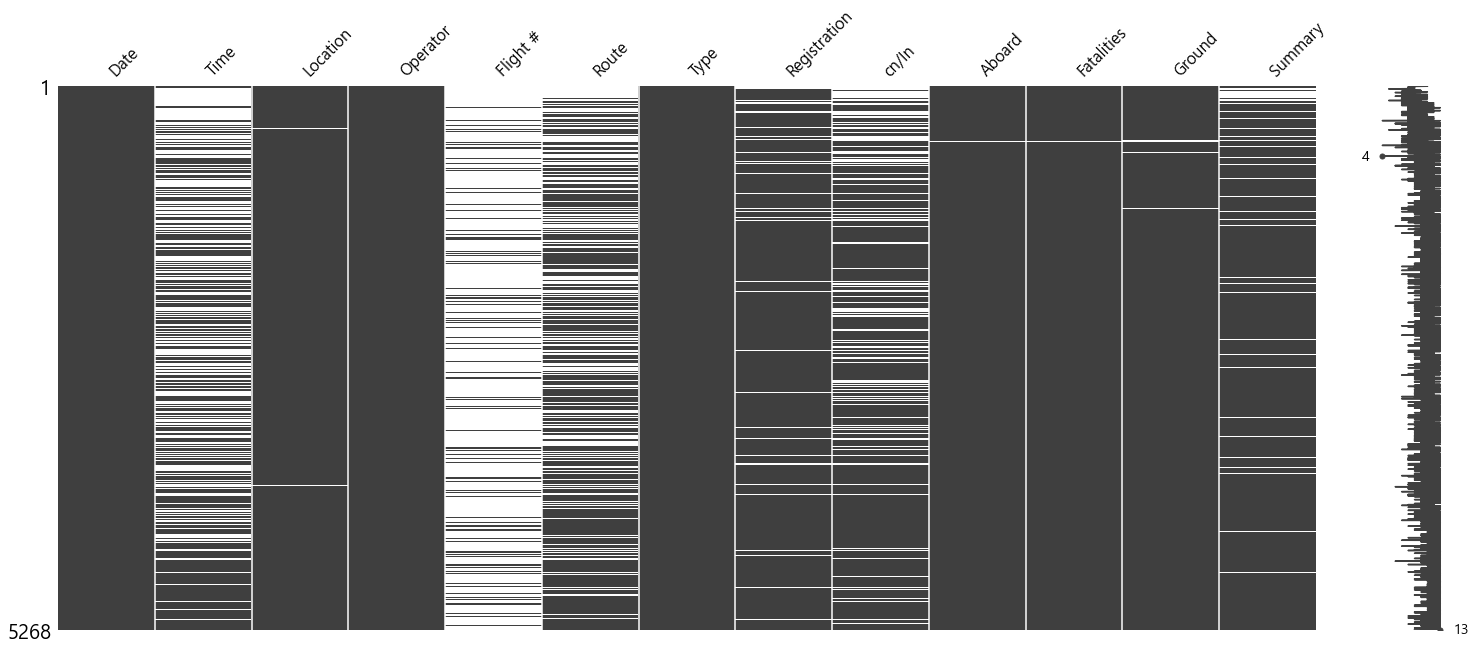

In [5]:
msno.matrix(data)

<AxesSubplot:>

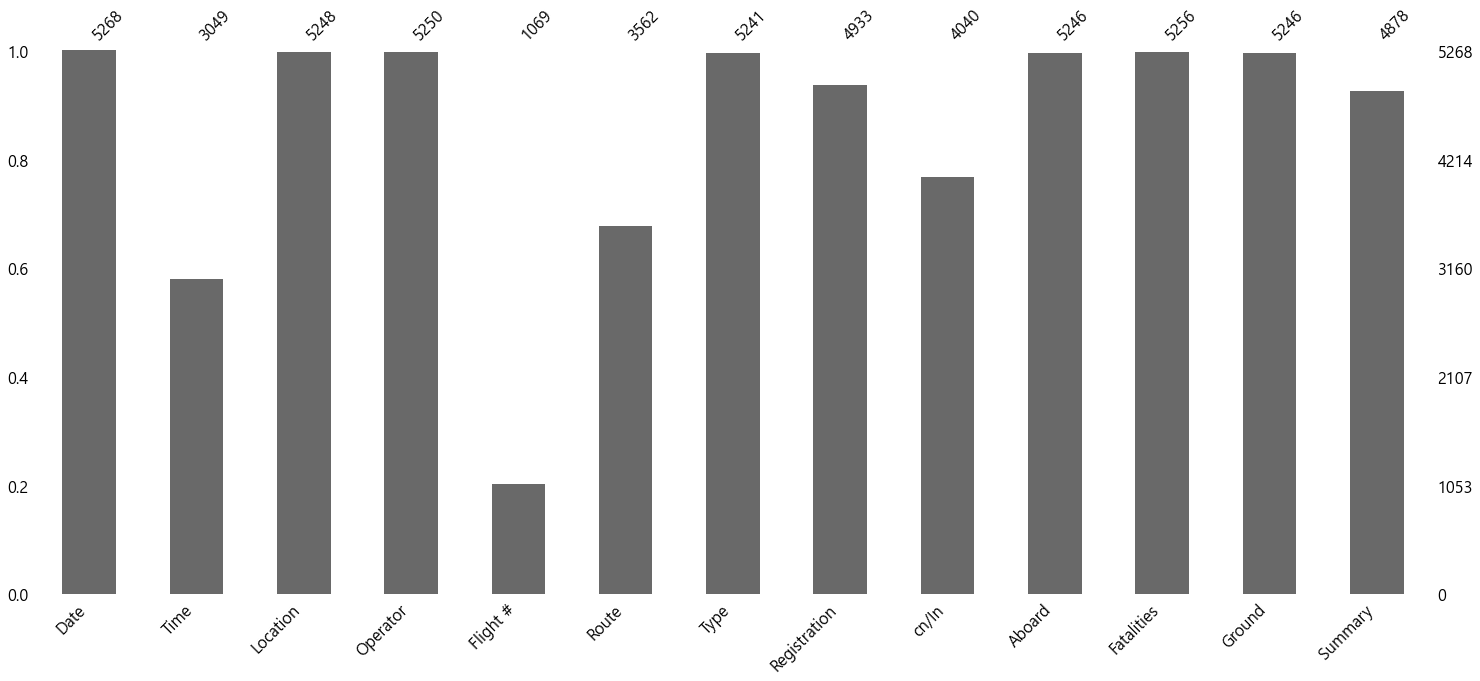

In [6]:
msno.bar(data)

### 결측치 채움

In [13]:
data['Location']=data['Location'].fillna('UnLocation',axis=0)

In [14]:
data['Operator']=data['Operator'].fillna('Unknown',axis=0)

In [21]:
data['Aboard']=data['Aboard'].fillna(0, axis=0)
data['Fatalities']=data['Fatalities'].fillna(0, axis=0)
data['Ground']=data['Ground'].fillna(0, axis=0)

In [22]:
data.isnull().sum()

Date               0
Time            2219
Location           0
Operator           0
Flight #        4199
Route           1706
Type              27
Registration     335
cn/In           1228
Aboard             0
Fatalities         0
Ground             0
Summary          390
dtype: int64

In [9]:
data.dtypes

Date             object
Time             object
Location         object
Operator         object
Flight #         object
Route            object
Type             object
Registration     object
cn/In            object
Aboard          float64
Fatalities      float64
Ground          float64
Summary          object
dtype: object

### 데이트 타입 변경

In [26]:
data['Date'] = pd.to_datetime(data['Date'])

In [27]:
data['Date_year'] = data['Date'].dt.year

### 이상치 확인

In [34]:
Aboard_mean = data.groupby(data['Date_year'])['Aboard'].mean()


Fatalities_mean = data.groupby(data['Date_year'])['Fatalities'].mean()


Ground_mean = data.groupby(data['Date_year'])['Ground'].mean()



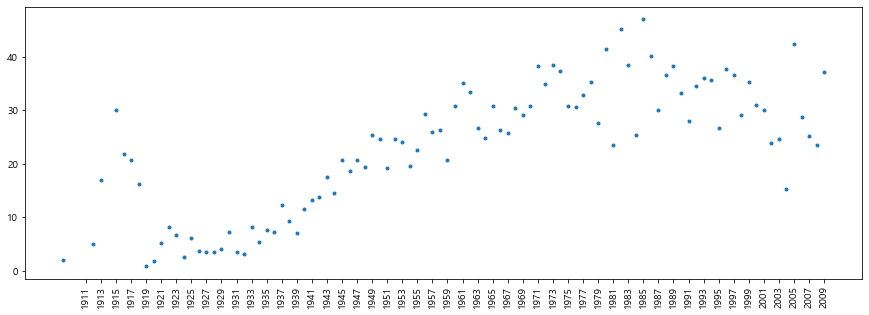

In [35]:
plt.figure(figsize=(15,5))
plt.plot(Aboard_mean, '.')
plt.xticks(range(1911,2010,2), rotation=90)
plt.show()

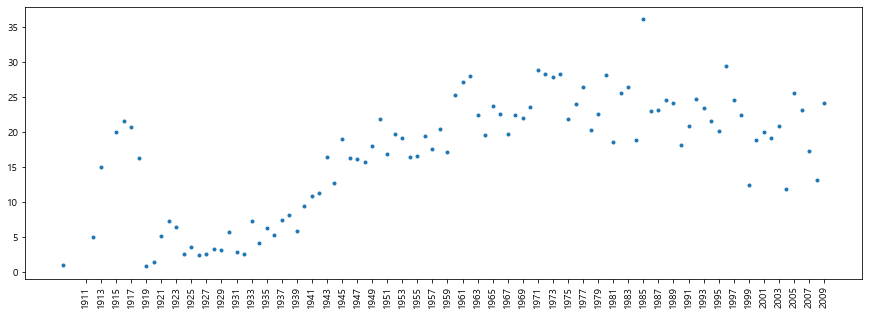

In [36]:
plt.figure(figsize=(15,5))
plt.plot(Fatalities_mean, '.')
plt.xticks(range(1911,2010,2), rotation=90)
plt.show()

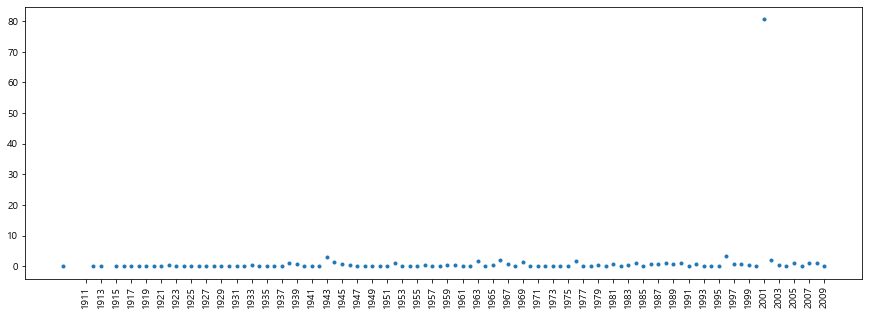

In [37]:
plt.figure(figsize=(15,5))
plt.plot(Ground_mean, '.')
plt.xticks(range(1911,2010,2), rotation=90)
plt.show()

In [38]:
Ground_mean.drop(index=[2001], inplace=True)

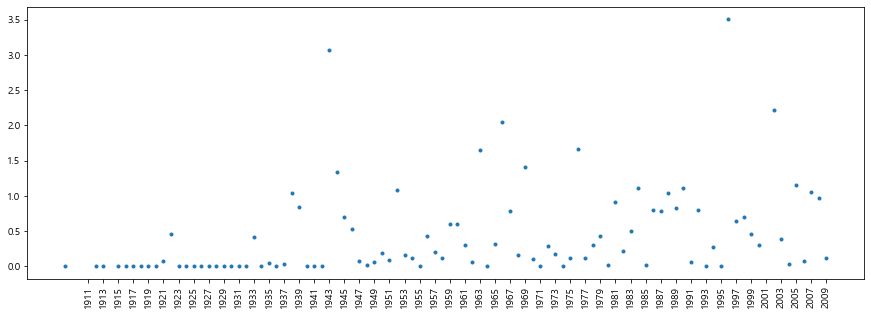

In [39]:
plt.figure(figsize=(15,5))
plt.plot(Ground_mean, '.')
plt.xticks(range(1911,2010,2), rotation=90)
plt.show()

## 데이터 분석

In [40]:
Aboard_min = data.groupby(data['Date_year'])['Aboard'].min()
Aboard_max = data.groupby(data['Date_year'])['Aboard'].max()

Fatalities_min = data.groupby(data['Date_year'])['Fatalities'].min()
Fatalities_max = data.groupby(data['Date_year'])['Fatalities'].max()

Ground_min = data.groupby(data['Date_year'])['Ground'].min()
Ground_max = data.groupby(data['Date_year'])['Ground'].max()

(array([1900., 1920., 1940., 1960., 1980., 2000., 2020.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

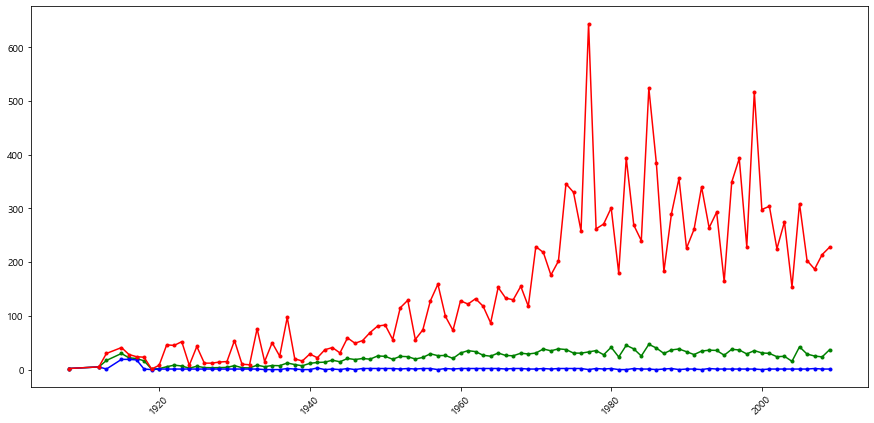

In [41]:
plt.figure(figsize=(15,7))


plt.plot(Aboard_mean, 'g.-')
plt.plot(Aboard_min, 'b.-')
plt.plot(Aboard_max, 'r.-')
plt.xticks(range(1911,2010,2), rotation=45)

([<matplotlib.axis.XTick at 0x2efce251640>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

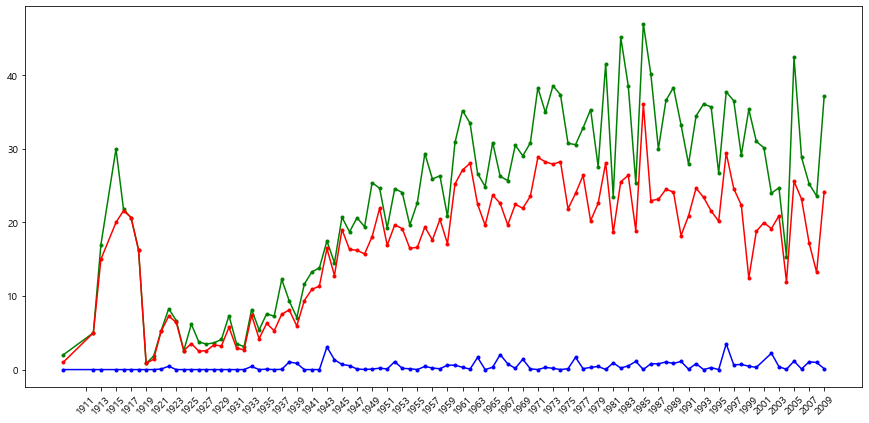

In [42]:
plt.figure(figsize=(15,7))


plt.plot(Aboard_mean, 'g.-')
plt.plot(Fatalities_mean, 'r.-')
plt.plot(Ground_mean, 'b.-')
plt.xticks(range(1911,2010,2), rotation=45)